# Workflows registered at Roboflow platform

In this example, we would like to present Roboflow workflows that are registered at Roboflow platform. Roboflow APP exposes
UI which can be used to create your workflow definition. When workflow is created - it will be assigned unique identifier that 
can be find in URL identifing created workflow:

```
https://infer.roboflow.com/workflows/{your_workspace}/{workflow_name}
```

First, create workflow in UI, then continue the execution of this notebook.

Docs are available [here](https://github.com/roboflow/inference/tree/main/inference/enterprise/workflows).

## Install External Dependancies

In this example, we'll use [Supervision](https://github.com/roboflow/supervision) to annotate an image with our inference results.

In [8]:
!pip install supervision==0.18.0

In [21]:
from utils import get_roboflow_api_key

api_key = get_roboflow_api_key()

Roboflow API Key: ········


### Helper functions

In [25]:
import requests
import numpy as np
import cv2

def get_image(url: str) -> np.ndarray:
    response = requests.get(url)
    response.raise_for_status()
    image_data = np.frombuffer(response.content, dtype=np.uint8)
    return cv2.imdecode(image_data, cv2.IMREAD_UNCHANGED)

### Inference client

`inference_sdk` package has HTTP client capable to interact with `workflows`. Let's initialse the client.

In [44]:
import supervision as sv
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient, VisualisationResponseFormat, InferenceConfiguration

In [22]:
CLIENT = InferenceHTTPClient(
    api_url="http://127.0.0.1:9001",
    api_key=api_key
)

# to ease visualisation, we will make the image outputs translated to np.array
CLIENT.configure(
    InferenceConfiguration(output_visualisation_format=VisualisationResponseFormat.NUMPY)
)

## Running registered `workflow` with single object-detection model

In [37]:
# IMAGE_URL = "URL_to_your_image"

# example
IMAGE_URL = "https://source.roboflow.com/zD7y6XOoQnh7WC160Ae7/Mv1V024s2QbaKY2zYPAv/original.jpg"
IMAGE = get_image(IMAGE_URL)
WORKSPACE_NAME = "roboflow-universe-projects"
SIMPLE_WORKFLOW_NAME = "2c2ba5bf-7ed5-43f5-a57e-c7666577c60f"

In [38]:
results = CLIENT.infer_from_workflow(
    workspace_name=WORKSPACE_NAME,
    workflow_name=SIMPLE_WORKFLOW_NAME,
    images={
        "image": IMAGE,
    }
)

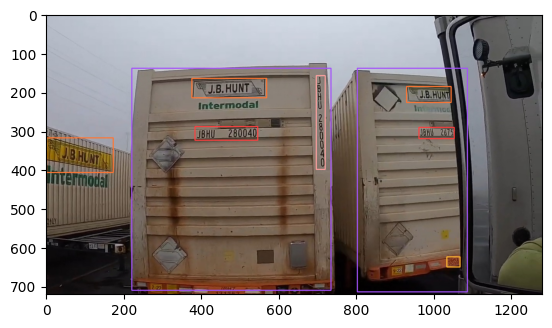

In [39]:
detection_data = {
    "image": {
        "height": IMAGE.shape[0],
        "width": IMAGE.shape[1],
    }, 
    "predictions": results["predictions"][0],
}
detections = sv.Detections.from_inference(detection_data)
annotator = sv.BoundingBoxAnnotator()

annotated_image = annotator.annotate(IMAGE.copy(), detections)

plt.imshow(annotated_image[:, :, ::-1])
plt.show()

## Running registered `workflow` - detection + OCR

In [40]:
# IMAGE_URL = "URL_to_your_image"

# example
IMAGE_URL = "https://source.roboflow.com/zD7y6XOoQnh7WC160Ae7/Mv1V024s2QbaKY2zYPAv/original.jpg"
IMAGE = get_image(IMAGE_URL)
WORKSPACE_NAME = "roboflow-universe-projects"
OCR_WORKFLOW_NAME = "32e990ff-3872-4ff7-94fa-9305d98d91ce"

In [41]:
results = CLIENT.infer_from_workflow(
    workspace_name=WORKSPACE_NAME,
    workflow_name=OCR_WORKFLOW_NAME,
    images={
        "image": IMAGE,
    }
)

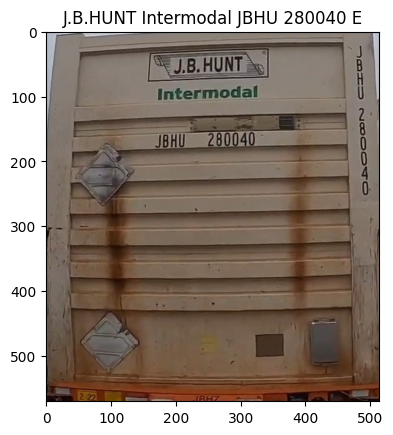

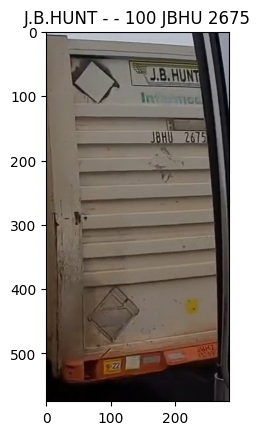

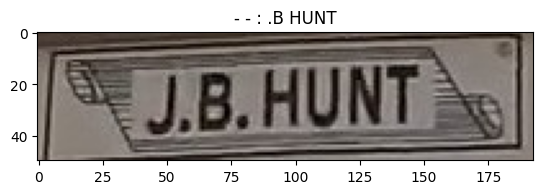

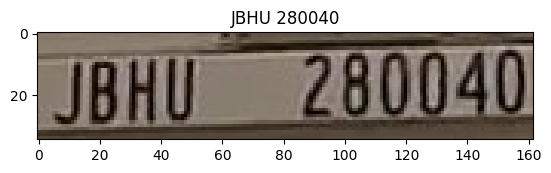

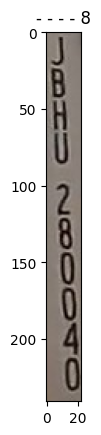

In [43]:
for ocr_result, crop in zip(results["ocr"], results["crops"]):
    if ocr_result == "":
        continue
    crop_image = crop["value"]
    plt.title(ocr_result)
    plt.imshow(crop_image[:, :, ::-1])
    plt.show()